In [3]:
import pandas as pd
pen=pd.read_csv("penguins_size.csv")
pen.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
pen.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
pen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
pen.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
pen=pen.drop([3,339],axis=0)
#all the column in this rows are having null values.

In [8]:
pen.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [9]:
pen.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  8
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
pen.iloc[:,:] = imputer.fit_transform(pen)

In [11]:
pen.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

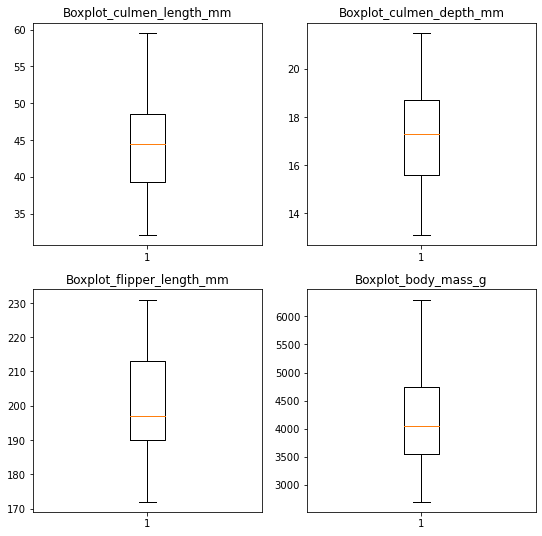

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
plt.subplot(2,2,1)
plt.boxplot(pen["culmen_length_mm"])
plt.title("Boxplot_culmen_length_mm")
plt.subplot(2,2,2)
plt.boxplot(pen["culmen_depth_mm"])
plt.title("Boxplot_culmen_depth_mm")
plt.subplot(2,2,3)
plt.boxplot(pen["flipper_length_mm"])
plt.title("Boxplot_flipper_length_mm")
plt.subplot(2,2,4)
plt.boxplot(pen["body_mass_g"])
plt.title("Boxplot_body_mass_g")
plt.show()
# no outliers in the dataset


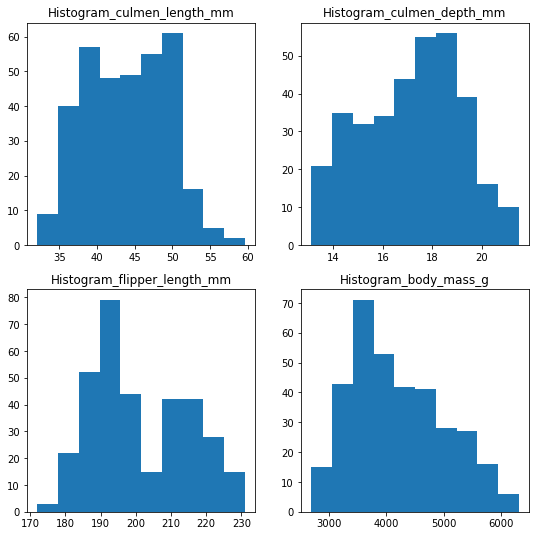

In [13]:
plt.figure(figsize=(9,9))
plt.subplot(2,2,1)
plt.hist(pen["culmen_length_mm"])
plt.title("Histogram_culmen_length_mm")
plt.subplot(2,2,2)
plt.hist(pen["culmen_depth_mm"])
plt.title("Histogram_culmen_depth_mm")
plt.subplot(2,2,3)
plt.hist(pen["flipper_length_mm"])
plt.title("Histogram_flipper_length_mm")
plt.subplot(2,2,4)
plt.hist(pen["body_mass_g"])
plt.title("Histogram_body_mass_g")
plt.show()

In [14]:
for i in pen.columns:
    print(i," = ",pen[i].nunique())

species  =  3
island  =  3
culmen_length_mm  =  164
culmen_depth_mm  =  80
flipper_length_mm  =  55
body_mass_g  =  94
sex  =  3


In [15]:
pen["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [16]:
pen[pen["sex"]=="."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [17]:
pen=pen.drop([336],axis=0)

In [18]:
print("species =",pen.species.unique())
print("island =",pen.island.unique())
print("sex =",pen.sex.unique())

species = ['Adelie' 'Chinstrap' 'Gentoo']
island = ['Torgersen' 'Biscoe' 'Dream']
sex = ['MALE' 'FEMALE']


In [19]:
pen["species"].value_counts()

Adelie       151
Gentoo       122
Chinstrap     68
Name: species, dtype: int64

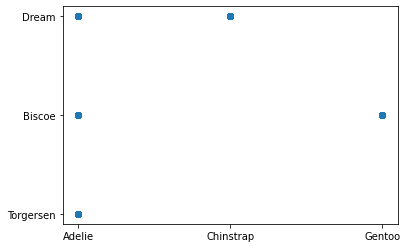

In [20]:
plt.scatter(pen["species"],pen["island"])
#Adelie lives in all three islands whereas Gentoo lives in Biscoe and Chinstrap lives in Torgersen.

In [21]:
pen_bm=pen["body_mass_g"].value_counts()
pen_bm.head()

3800.0    12
3700.0    11
3950.0    10
3900.0    10
3550.0     9
Name: body_mass_g, dtype: int64

In [22]:
pen[pen["body_mass_g"]==3800.0]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
22,Adelie,Biscoe,35.9,19.2,189.0,3800.0,FEMALE
24,Adelie,Biscoe,38.8,17.2,180.0,3800.0,MALE
25,Adelie,Biscoe,35.3,18.9,187.0,3800.0,FEMALE
57,Adelie,Biscoe,40.6,18.8,193.0,3800.0,MALE
82,Adelie,Torgersen,36.7,18.8,187.0,3800.0,FEMALE
86,Adelie,Dream,36.3,19.5,190.0,3800.0,MALE
162,Chinstrap,Dream,46.6,17.8,193.0,3800.0,FEMALE
175,Chinstrap,Dream,50.6,19.4,193.0,3800.0,MALE


In [23]:
pen[pen["body_mass_g"]==3700.0]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,MALE
15,Adelie,Torgersen,36.6,17.8,185.0,3700.0,FEMALE
55,Adelie,Biscoe,41.4,18.6,191.0,3700.0,MALE
74,Adelie,Torgersen,35.5,17.5,190.0,3700.0,FEMALE
76,Adelie,Torgersen,40.9,16.8,191.0,3700.0,FEMALE
96,Adelie,Dream,38.1,18.6,190.0,3700.0,FEMALE
150,Adelie,Dream,36.0,17.1,187.0,3700.0,FEMALE
161,Chinstrap,Dream,51.3,19.9,198.0,3700.0,MALE
164,Chinstrap,Dream,47.0,17.3,185.0,3700.0,FEMALE
169,Chinstrap,Dream,58.0,17.8,181.0,3700.0,FEMALE


In [24]:
pen.cov()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.893736,-2.539213,50.496502,2612.107405
culmen_depth_mm,-2.539213,3.905066,-16.191782,-746.686303
flipper_length_mm,50.496502,-16.191782,197.550181,9821.367949
body_mass_g,2612.107405,-746.686303,9821.367949,643685.613248


In [25]:
pen.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235015,0.657102,0.595476
culmen_depth_mm,-0.235015,1.000000,-0.582964,-0.470963
flipper_length_mm,0.657102,-0.582964,1.000000,0.870956
body_mass_g,0.595476,-0.470963,0.870956,1.000000


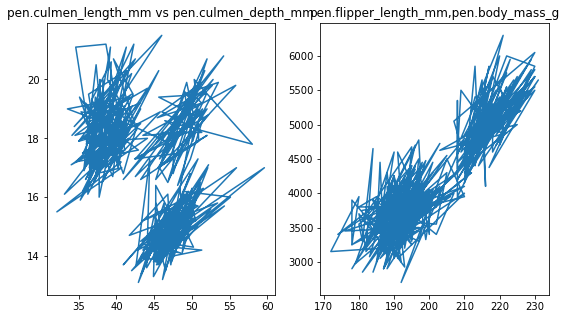

In [26]:
plt.figure(figsize=(9,5))
plt.subplot(1,2,1)
plt.plot(pen.culmen_length_mm,pen.culmen_depth_mm)
plt.title("pen.culmen_length_mm vs pen.culmen_depth_mm")
plt.subplot(1,2,2)
plt.plot(pen.flipper_length_mm,pen.body_mass_g)
plt.title("pen.flipper_length_mm,pen.body_mass_g")
plt.show()


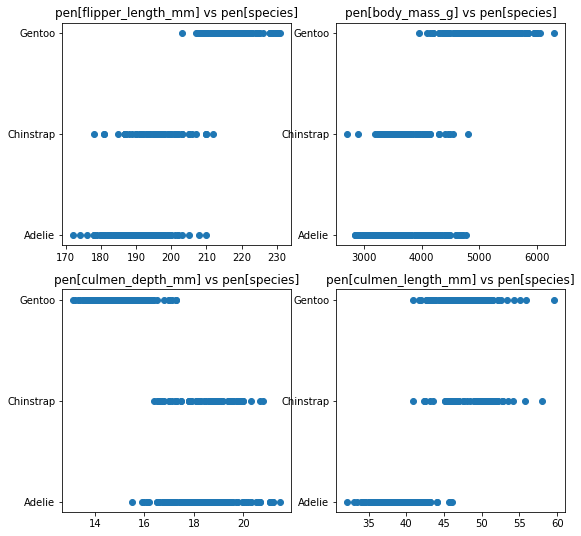

In [27]:
plt.figure(figsize=(9,9))
plt.subplot(2,2,1)
plt.scatter(pen['flipper_length_mm'],pen["species"])
plt.title("pen[flipper_length_mm] vs pen[species]")
plt.subplot(2,2,2)
plt.scatter(pen['body_mass_g'],pen["species"])
plt.title("pen[body_mass_g] vs pen[species]")
plt.subplot(2,2,3)
plt.scatter(pen['culmen_depth_mm'],pen["species"])
plt.title("pen[culmen_depth_mm] vs pen[species]")
plt.subplot(2,2,4)
plt.scatter(pen['culmen_length_mm'],pen["species"])
plt.title("pen[culmen_length_mm] vs pen[species]")
plt.show()

In [28]:
pen_flipper_length=pen[pen['flipper_length_mm']>=215]
pen_flipper_length["species"].unique()
#we can conclude that flipper length more than 215 can only exists in Gentoo

array(['Gentoo'], dtype=object)

In [29]:
pen_body_mass=pen[pen['body_mass_g']>=5000]
pen_body_mass["species"].unique()
#only Gentoo body mass greater than 5000 grams.

array(['Gentoo'], dtype=object)

In [30]:
pen_culmen_depth_mm=pen[pen['culmen_depth_mm']<=15]
pen_culmen_depth_mm["species"].unique()
#Gentoo culmen_depth_mm is less than 15

array(['Gentoo'], dtype=object)

In [31]:
pen_culmen_length_mm=pen[pen['culmen_length_mm']<=40]
pen_culmen_length_mm["species"].unique()
#adelie culmen_length_mm is less than 40

array(['Adelie'], dtype=object)

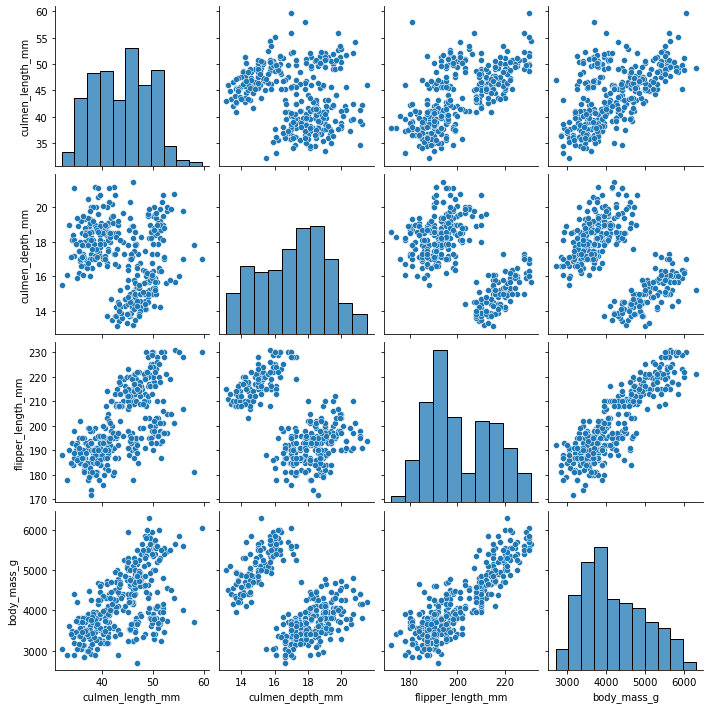

In [32]:
import seaborn as sns
sns.pairplot(pen)

In [33]:
#conclusions:
#Adelie lives in all three islands whereas Gentoo lives in Biscoe and Chinstrap lives in Torgersen.
#most of Gentoo has unique flipper length, body mass, culmen depth
#Most of adelie culmen length is less than 40mm